INTRODUCTION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("unicorns till sep 2022.csv")

df.head()  # Quick overview

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


DATA CLEANING:

In [ ]:
# --- Data Cleaning ---

# 1. Remove extra spaces in column names
df.columns = df.columns.str.strip()

# 2. Rename columns for consistency
df = df.rename(columns={
    "Valuation ($B)": "Valuation",
    "Date Joined": "Date_Joined",
    "CityA": "City"
})

# 3. Convert Valuation to numeric (remove $ and convert to float)
df["Valuation"] = df["Valuation"].str.replace("$", "", regex=False).astype(float)

# 4. Handle missing values (fill with 'Unknown')
df.fillna({
    "City": "Unknown",
    "Country": "Unknown",
    "Industry": "Unknown",
    "Investors": "Unknown"
}, inplace=True)

# 5. Remove duplicate companies (if any)
df.drop_duplicates(subset="Company", inplace=True)

from dateutil import parser

def parse_date(x):
    try:
        return parser.parse(str(x), dayfirst=False)  # assume MM/DD/YYYY first
    except:
        try:
            return parser.parse(str(x), dayfirst=True)  # fallback to DD/MM/YYYY
        except:
            return pd.NaT

df["Date_Joined"] = df["Date_Joined"].apply(parse_date)
df["Year_Joined"] = df["Date_Joined"].dt.year


# Check cleaned data
df.head()



,Company,Valuation,Date_Joined,Country,City,Industry,Investors,Year_Joined
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018


EXPLORATORY DATA ANALYSIS

Q1. Top 10 Highest Valuation Projects 

         Company  Valuation
0      ByteDance      140.0
1         SpaceX      127.0
2          SHEIN      100.0
3         Stripe       95.0
4          Canva       40.0
5   Checkout.com       40.0
6      Instacart       39.0
7     Databricks       38.0
8        Revolut       33.0
10           FTX       32.0


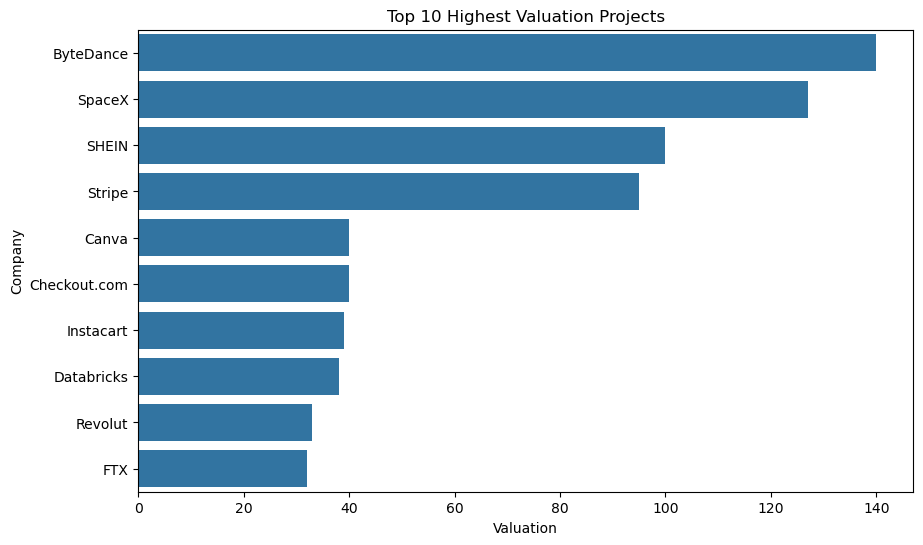

In [ ]:
top_10_projects = df.sort_values(by="Valuation", ascending=False).head(10)
print(top_10_projects[["Company", "Valuation"]])


# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x="Valuation", y="Company", data=top_10_projects)
plt.title("Top 10 Highest Valuation Projects")
plt.show()

Q2. Earliest vs Latest Joined Projects

In [ ]:
earliest = df.sort_values(by="Date_Joined").head(1)
latest = df.sort_values(by="Date_Joined", ascending=False).head(1)

print("Earliest:", earliest[["Company", "Date_Joined"]])
print("Latest:", latest[["Company", "Date_Joined"]])


Earliest:     Company Date_Joined
710  Veepee  2007-07-02
Latest:     Company Date_Joined
338  Tridge  2022-08-24


Q3. Highest-Valued Projects by country and city

Top Countries by Highest Valuation:
Country
China             140.0
United States     127.0
Australia          40.0
United Kingdom     40.0
Bahamas            32.0
India              22.0
Indonesia          20.0
Germany            13.0
Turkey             11.8
Seychelles         10.0
Name: Valuation, dtype: float64

Top Cities by Highest Valuation:
City
Beijing          140.0
Hawthorne        127.0
Shenzhen         100.0
San Francisco     95.0
London            40.0
Surry Hills       40.0
Fintech           32.0
Cary              31.5
Jacksonville      27.0
Bengaluru         22.0
Name: Valuation, dtype: float64


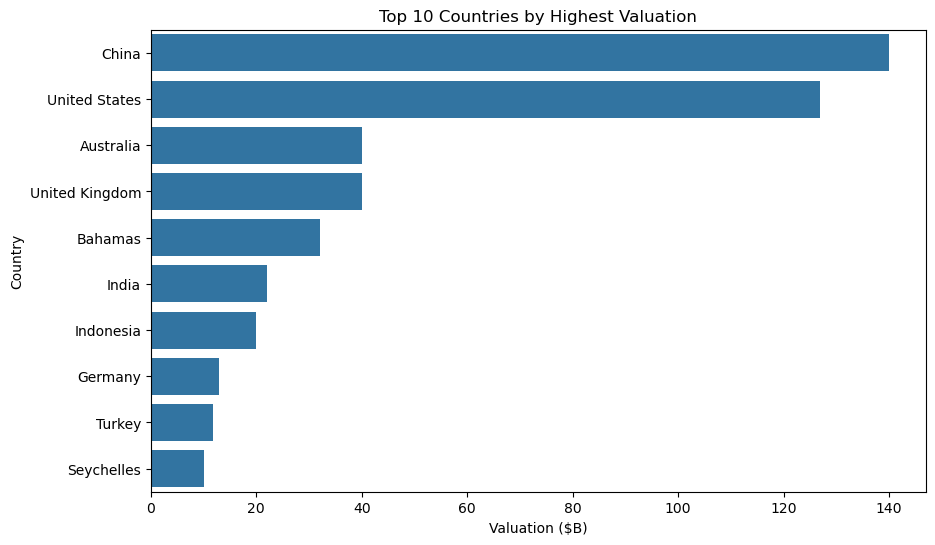

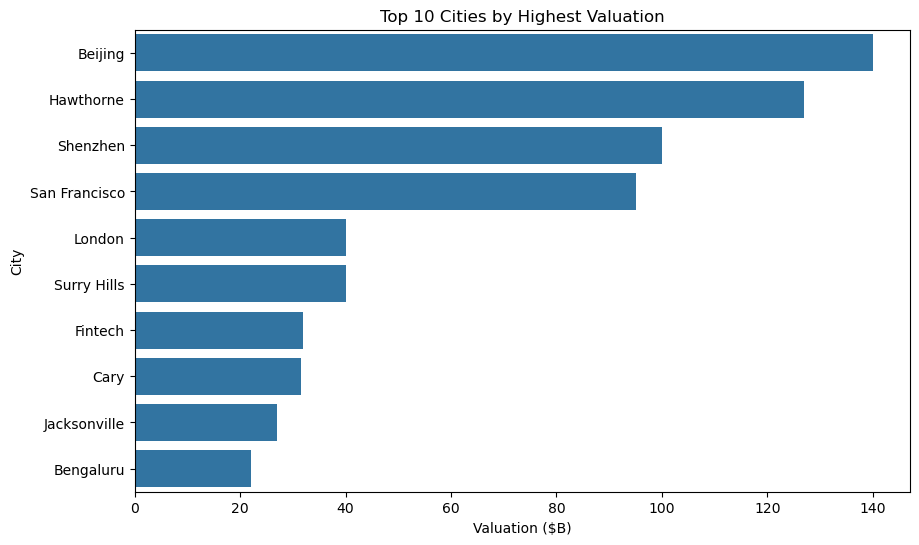

In [ ]:
# Group by country: highest valuation
highest_by_country = df.groupby("Country")["Valuation"].max().sort_values(ascending=False).head(10)
print("Top Countries by Highest Valuation:")
print(highest_by_country)

# Group by city: highest valuation
highest_by_city = df.groupby("City")["Valuation"].max().sort_values(ascending=False).head(10)
print("\nTop Cities by Highest Valuation:")
print(highest_by_city)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=highest_by_country.values, y=highest_by_country.index)
plt.title("Top 10 Countries by Highest Valuation")
plt.xlabel("Valuation ($B)")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=highest_by_city.values, y=highest_by_city.index)
plt.title("Top 10 Cities by Highest Valuation")
plt.xlabel("Valuation ($B)")
plt.show()


Q4. Which Industry has the Highest Valuation Project?

Industry
Sequoia Capital, Thoma Bravo, Softbank    32.000000
Other                                      4.518769
Artificial intelligence                    4.256892
E-commerce & direct-to-consumer            3.759126
Fintech                                    3.589832
Kuang-Chi                                  3.500000
Supply chain, logistics, & delivery        3.288594
Data management & analytics                3.150889
Auto & transportation                      3.104359
Edtech                                     3.064687
Name: Valuation, dtype: float64


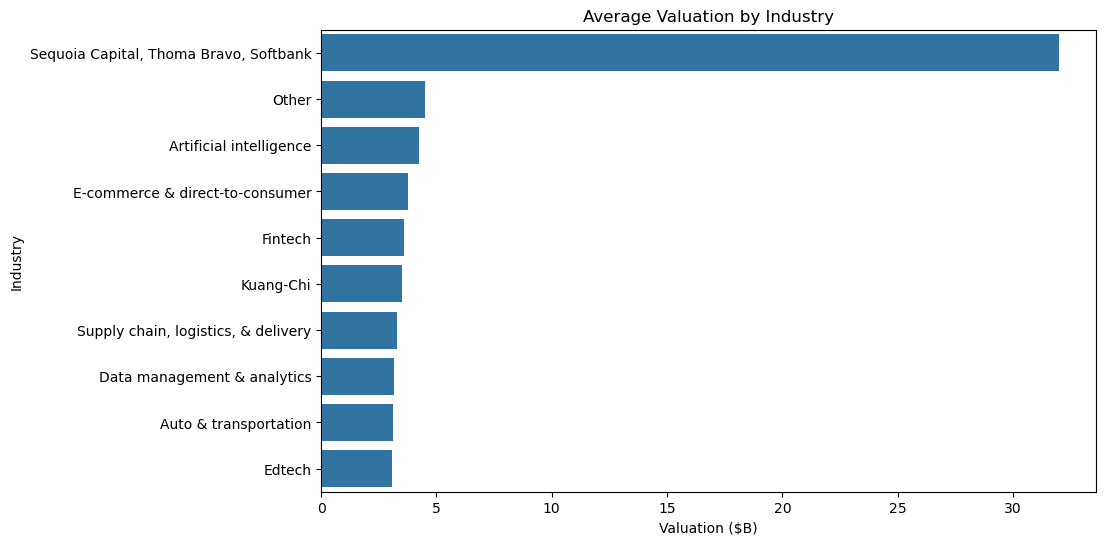

In [ ]:
industry_valuation = df.groupby("Industry")["Valuation"].mean().sort_values(ascending=False).head(10)
print(industry_valuation)

plt.figure(figsize=(10,6))
sns.barplot(x=industry_valuation.values, y=industry_valuation.index)
plt.title("Average Valuation by Industry")
plt.xlabel("Valuation ($B)")
plt.show()

Q5. Who are the Investors in the highest-values Projects?

In [ ]:
top_projects = df.sort_values(by="Valuation", ascending=False).head(10)
print(top_projects[["Company", "Valuation", "Investors"]])

# Most frequent investors across all unicorns
all_investors = df["Investors"].str.split(", ").explode()
print("\nTop 10 Most Frequent Investors:")
print(all_investors.value_counts().head(10))

         Company  Valuation                                          Investors
0      ByteDance      140.0  Sequoia Capital China, SIG Asia Investments, S...
1         SpaceX      127.0  Founders Fund, Draper Fisher Jurvetson, Rothen...
2          SHEIN      100.0  Tiger Global Management, Sequoia Capital China...
3         Stripe       95.0        Khosla Ventures, LowercaseCapital, capitalG
4          Canva       40.0  Sequoia Capital China, Blackbird Ventures, Mat...
5   Checkout.com       40.0  Tiger Global Management, Insight Partners, DST...
6      Instacart       39.0  Khosla Ventures, Kleiner Perkins Caufield & By...
7     Databricks       38.0  Andreessen Horowitz, New Enterprise Associates...
8        Revolut       33.0         index Ventures, DST Global, Ribbit Capital
10           FTX       32.0                                            Unknown

Top 10 Most Frequent Investors:
Investors
Accel                          62
Andreessen Horowitz            58
Tiger Global Managem

Q6. Growth-Trend count of unicorns by year

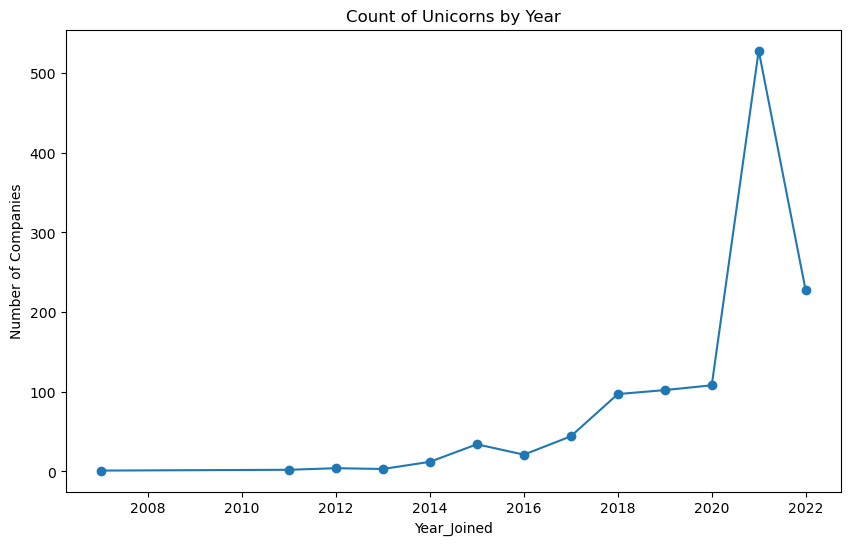

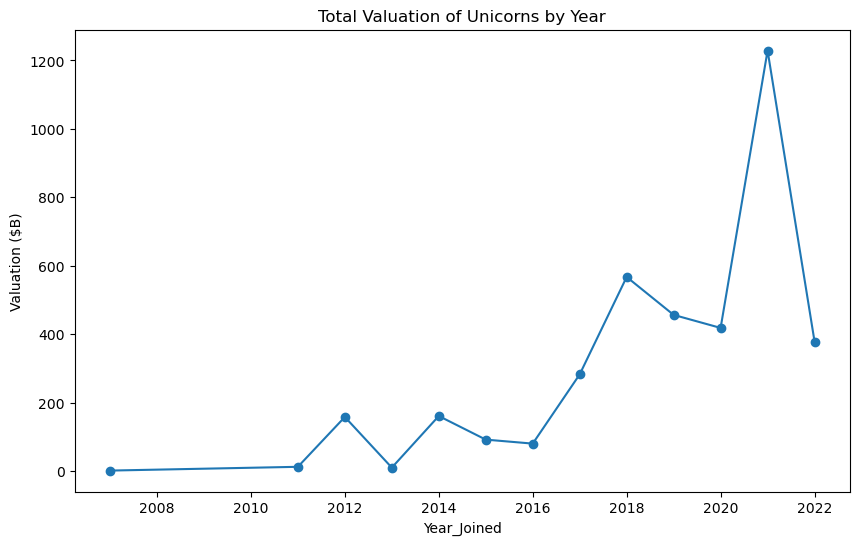

In [ ]:
yearly_counts = df.groupby("Year_Joined")["Company"].count()
yearly_valuation = df.groupby("Year_Joined")["Valuation"].sum()

plt.figure(figsize=(10,6))
yearly_counts.plot(marker="o")
plt.title("Count of Unicorns by Year")
plt.ylabel("Number of Companies")
plt.show()

plt.figure(figsize=(10,6))
yearly_valuation.plot(marker="o")
plt.title("Total Valuation of Unicorns by Year")
plt.ylabel("Valuation ($B)")
plt.show()

Q7. Youngest Projects with high valuation

In [ ]:
latest_year = df["Year_Joined"].max()
latest_cohort = df[df["Year_Joined"] == latest_year].copy()

youngest_top1 = latest_cohort.sort_values(["Valuation","Date_Joined"],
                                          ascending=[False, False]).head(1)
print("Youngest project with highest valuation (latest year):")
print(youngest_top1[["Company","Valuation","Date_Joined"]])

# If you want the top 10 from the latest year:
youngest_top10 = latest_cohort.sort_values(["Valuation","Date_Joined"],
                                           ascending=[False, False]).head(10)



Youngest project with highest valuation (latest year):
   Company  Valuation Date_Joined
16    Miro       17.5  2022-01-05


Q8. Average and Median Valuation by Coubtry and Industry

In [ ]:
country_stats = df.groupby("Country")["Valuation"].agg(["mean", "median"]).sort_values("mean", ascending=False).head(10)
industry_stats = df.groupby("Industry")["Valuation"].agg(["mean", "median"]).sort_values("mean", ascending=False).head(10)

print("\nTop Countries by Avg & Median Valuation:")
print(country_stats)

print("\nTop Industries by Avg & Median Valuation:")
print(industry_stats)


Top Countries by Avg & Median Valuation:
                     mean  median
Country                          
Bahamas         32.000000  32.000
Seychelles      10.000000  10.000
Australia        6.800000   1.550
Turkey           5.256667   2.750
United Kingdom   4.466304   1.850
Indonesia        4.161429   1.130
China            3.899943   1.455
Austria          3.805000   3.805
Denmark          3.350000   3.350
United States    3.261577   1.670

Top Industries by Avg & Median Valuation:
                                             mean  median
Industry                                                 
Sequoia Capital, Thoma Bravo, Softbank  32.000000   32.00
Other                                    4.518769    1.50
Artificial intelligence                  4.256892    1.60
E-commerce & direct-to-consumer          3.759126    1.52
Fintech                                  3.589832    1.90
Kuang-Chi                                3.500000    3.50
Supply chain, logistics, & delivery      3.